In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [3]:
f = h5py.File("data/211105_130537_survey_scan.h5", 'r')
M =f['measurement/survey_scan']
M.keys()

<KeysViewHDF5 ['image_coords', 'image_strips', 'image_times', 'images', 'img_map', 'settings', 'strip_rects', 'y_array']>

In [4]:
plt.figure()
plt.imshow(M['images'][289])

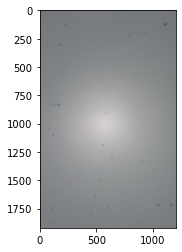

In [23]:
bg = imageio.imread('ref_211105_102555_flircam_live.tif').swapaxes(0,1)[:,::-1]
plt.figure()
plt.imshow(bg)

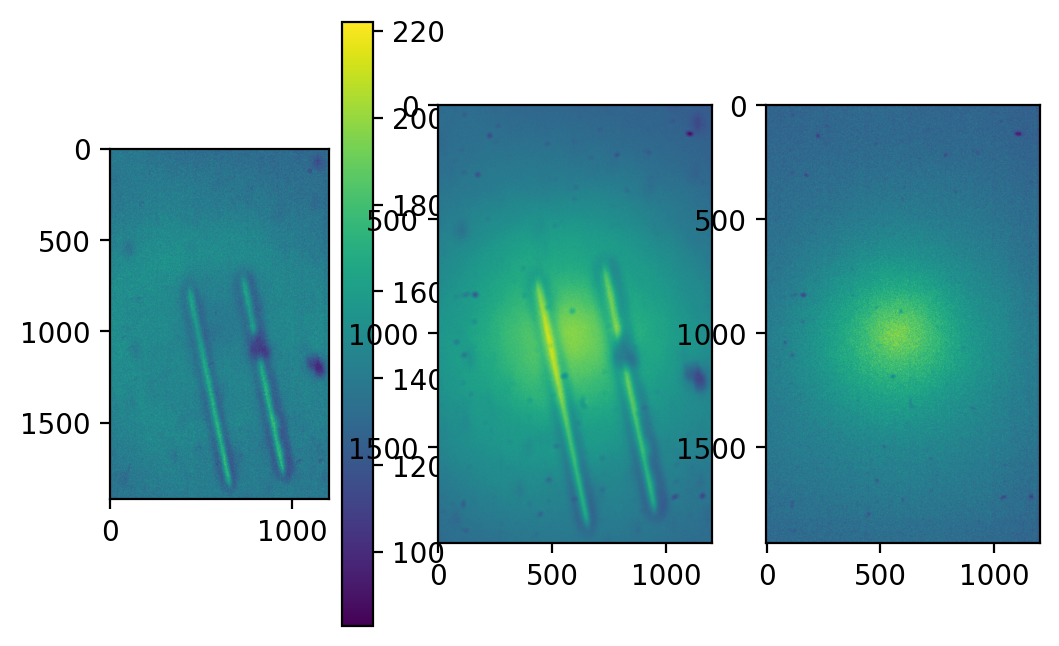

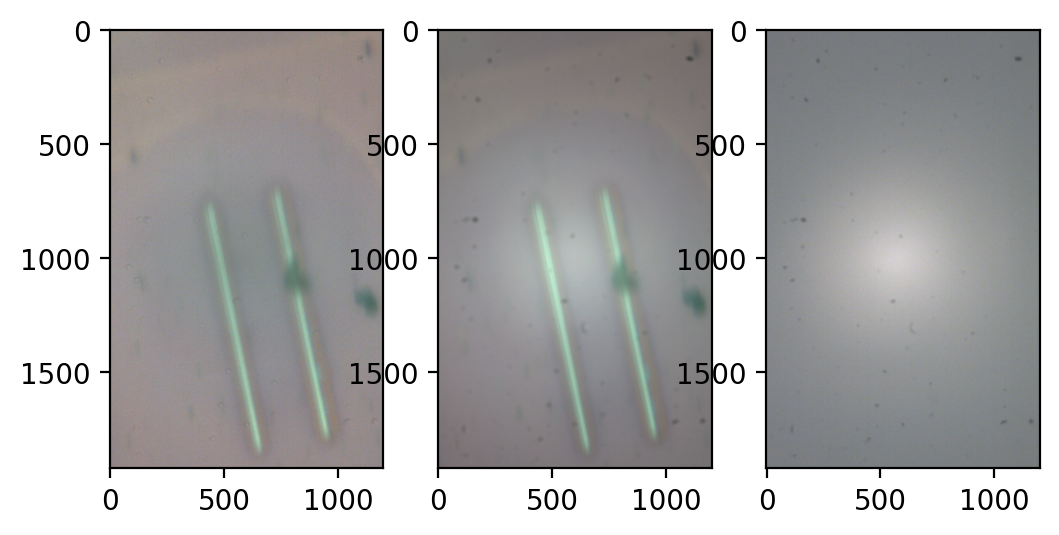

In [24]:
im = M['images'][289]
A = im/bg
A = np.array(150*A, dtype=np.uint8)
plt.figure(dpi=200)
plt.subplot(131)
plt.imshow(A[:,:,2])
plt.colorbar()
plt.subplot(132)
plt.imshow(im[:,:,2])
plt.subplot(133)
plt.imshow(bg[:,:,2])
#(255*A/np.linalg.norm(A))

plt.figure(dpi=200)
plt.subplot(131)
plt.imshow(A[:,:,:])
#plt.colorbar()
plt.subplot(132)
plt.imshow(im[:,:,:])
plt.subplot(133)
plt.imshow(bg[:,:,:])

In [11]:
np.percentile(M['images'], [1,99])

array([ 72., 221.])

In [12]:
np.percentile(bg, [1,99])

array([114., 200.])

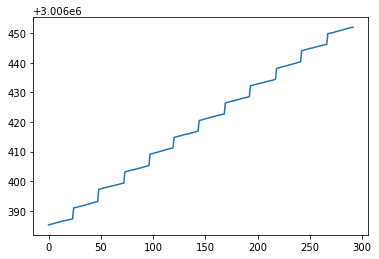

In [95]:
plt.plot(M['image_times'][1:])

In [96]:
plt.figure(dpi=200)
plt.imshow(M['image_strips'][10].swapaxes(0,1))

In [97]:
# downsampled full image

zoom = 4 # power of 2 reduction
skip = 2**4


ii = 289
im = M['images'][ii]

x,y = M['image_coords'][ii]
x0 = M['settings'].attrs['x0']
y0 = M['settings'].attrs['y0']


Nx_strip = int(abs(x1-x0) / um_per_px) + Nx


print(ii, x,y)

scale = M['settings'].attrs['img_scale'] # um per full frame x
Nx, Ny, Nchan = im.shape
um_per_px = scale / Nx

print( um_per_px)
ii0 = int( (x - x0) / um_per_px )
# if not (0 < ii0 < img_strip.shape[0]):
#     continue
ii1 = ii0 + Nx

jj0 = int( (y - y0) / um_per_px )
jj1 = jj0 + Ny

print(ii0,ii1, jj0,jj1)



NameError: name 'x1' is not defined

In [98]:
img_map = np.array(M['img_map'])

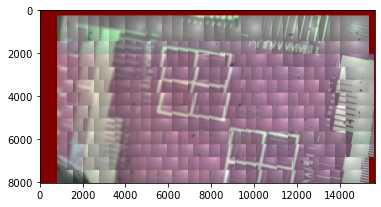

In [100]:
plt.imshow(img_map.swapaxes(0,1)[::-1])